In [14]:
import pandas as pd

df_labels = pd.read_csv(
    r"C:\Users\Leon\Desktop\YieldGuard Semiconductor Process Feature Selection\secom\secom_labels.data",
    sep="\s+",  # 空白分隔
    header=None,
    names=["Label", "Timestamp"]
)

print(df_labels.head(10))

# 標籤分布
print("\n標籤分布：")
print(df_labels["Label"].value_counts())

# 如果想漂亮一點呈現時間戳記，轉成 datetime
df_labels["Timestamp"] = pd.to_datetime(df_labels["Timestamp"])

print("\n時間戳記範例：")
print(df_labels["Timestamp"].head(5))


   Label            Timestamp
0     -1  19/07/2008 11:55:00
1     -1  19/07/2008 12:32:00
2      1  19/07/2008 13:17:00
3     -1  19/07/2008 14:43:00
4     -1  19/07/2008 15:22:00
5     -1  19/07/2008 17:53:00
6     -1  19/07/2008 19:44:00
7     -1  19/07/2008 19:45:00
8     -1  19/07/2008 20:24:00
9     -1  19/07/2008 21:35:00

標籤分布：
Label
-1    1463
 1     104
Name: count, dtype: int64

時間戳記範例：
0   2008-07-19 11:55:00
1   2008-07-19 12:32:00
2   2008-07-19 13:17:00
3   2008-07-19 14:43:00
4   2008-07-19 15:22:00
Name: Timestamp, dtype: datetime64[ns]


C:\Users\Leon\AppData\Local\Temp\ipykernel_20096\3789156760.py:17: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_labels["Timestamp"] = pd.to_datetime(df_labels["Timestamp"])


In [15]:
df_labels = pd.read_csv(
    r"C:\Users\Leon\Desktop\YieldGuard Semiconductor Process Feature Selection\secom\secom.data",
    sep="\s+",  # 空白分隔
    header=None,
    names=["Label", "Timestamp"]
)

print(df_labels.head(10))

# 標籤分布
print("\n標籤分布：")
print(df_labels["Label"].value_counts())

# 如果想漂亮一點呈現時間戳記，轉成 datetime
df_labels["Timestamp"] = pd.to_datetime(df_labels["Timestamp"])

print("\n時間戳記範例：")
print(df_labels["Timestamp"].head(5))

查看缺失值

In [16]:
import pandas as pd

# 讀取資料，因為缺失值是 'NaN' 字串，要指定 na_values 參數
df = pd.read_csv('C:/Users/Leon/Desktop/YieldGuard Semiconductor Process Feature Selection/secom/secom.data', 
                 sep=' ', header=None, na_values='NaN')

# 計算每欄缺失值數量
missing_counts = df.isna().sum()

print(missing_counts)


0       6
1       7
2      14
3      14
4      14
       ..
585     1
586     1
587     1
588     1
589     1
Length: 590, dtype: int64


In [17]:
# 讀取資料，缺失值用 'NaN' 字串表示
df = pd.read_csv('C:/Users/Leon/Desktop/YieldGuard Semiconductor Process Feature Selection/secom/secom.data', 
                 sep=' ', header=None, na_values='NaN')

# 用中位數補齊每一欄的缺失值
df_filled = df.fillna(df.median())

# 檢查補齊後是否還有缺失值
print(df_filled.isna().sum())


0      0
1      0
2      0
3      0
4      0
      ..
585    0
586    0
587    0
588    0
589    0
Length: 590, dtype: int64


In [18]:

# 讀取資料，指定缺失值為 'NaN' 字串
df = pd.read_csv(
    'C:/Users/Leon/Desktop/YieldGuard Semiconductor Process Feature Selection/secom/secom.data',
    sep=' ',
    header=None,
    na_values='NaN'
)

# 自動產生欄位名稱 feature_0, feature_1, ..., feature_589
df.columns = [f'feature_{i}' for i in range(df.shape[1])]

# 補齊缺失值，使用中位數填補
df.fillna(df.median(), inplace=True)

# 印出前五筆資料，確認結果
print(df.head())


   feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0    3030.93    2564.00  2187.7333  1411.1265     1.3602      100.0   
1    3095.78    2465.14  2230.4222  1463.6606     0.8294      100.0   
2    2932.61    2559.94  2186.4111  1698.0172     1.5102      100.0   
3    2988.72    2479.90  2199.0333   909.7926     1.3204      100.0   
4    3032.24    2502.87  2233.3667  1326.5200     1.5334      100.0   

   feature_6  feature_7  feature_8  feature_9  ...  feature_580  feature_581  \
0    97.6133     0.1242     1.5005     0.0162  ...       0.0047      72.2889   
1   102.3433     0.1247     1.4966    -0.0005  ...       0.0060     208.2045   
2    95.4878     0.1241     1.4436     0.0041  ...       0.0148      82.8602   
3   104.2367     0.1217     1.4882    -0.0124  ...       0.0044      73.8432   
4   100.3967     0.1235     1.5031    -0.0031  ...       0.0047      72.2889   

   feature_582  feature_583  feature_584  feature_585  feature_586  \
0       0.5005       0

In [19]:
print(df.describe())

         feature_0    feature_1    feature_2    feature_3    feature_4  \
count  1567.000000  1567.000000  1567.000000  1567.000000  1567.000000   
mean   3014.441551  2495.866110  2200.551958  1395.383474     4.171281   
std      73.480841    80.228143    29.380973   439.837330    56.103721   
min    2743.240000  2158.750000  2060.660000     0.000000     0.681500   
25%    2966.665000  2452.885000  2181.099950  1083.885800     1.017700   
50%    3011.490000  2499.405000  2201.066700  1285.214400     1.316800   
75%    3056.540000  2538.745000  2218.055500  1590.169900     1.518800   
max    3356.350000  2846.440000  2315.266700  3715.041700  1114.536600   

       feature_5    feature_6    feature_7    feature_8    feature_9  ...  \
count     1567.0  1567.000000  1567.000000  1567.000000  1567.000000  ...   
mean       100.0   101.116476     0.121825     1.462860    -0.000842  ...   
std          0.0     6.209385     0.008936     0.073849     0.015107  ...   
min        100.0    82.13

In [20]:
import polars as pl
import numpy as np

def compute_feature_stats(df, bins=50):
    df_pl = pl.from_pandas(df)
    hist_results = {}

    for col in df_pl.columns:
        data = df_pl[col].drop_nulls().to_numpy()
        hist, bin_edges = np.histogram(data, bins=bins)
        hist_results[col] = {
            "bin_edges": bin_edges,
            "counts": hist,
            "mean": np.mean(data),
            "median": np.median(data),
            "std": np.std(data),
            "min": np.min(data),
            "max": np.max(data)
        }
    return hist_results

# 調用函式，得到結果存在 new_var
new_var = compute_feature_stats(df)

# 你可以印出檢查
for col, stats in new_var.items():
    print(f"{col}: mean={stats['mean']:.4f}, median={stats['median']:.4f}, std={stats['std']:.4f}, min={stats['min']:.4f}, max={stats['max']:.4f}")


feature_0: mean=3014.4416, median=3011.4900, std=73.4574, min=2743.2400, max=3356.3500
feature_1: mean=2495.8661, median=2499.4050, std=80.2025, min=2158.7500, max=2846.4400
feature_2: mean=2200.5520, median=2201.0667, std=29.3716, min=2060.6600, max=2315.2667
feature_3: mean=1395.3835, median=1285.2144, std=439.6970, min=0.0000, max=3715.0417
feature_4: mean=4.1713, median=1.3168, std=56.0858, min=0.6815, max=1114.5366
feature_5: mean=100.0000, median=100.0000, std=0.0000, min=100.0000, max=100.0000
feature_6: mean=101.1165, median=101.5122, std=6.2074, min=82.1311, max=129.2522
feature_7: mean=0.1218, median=0.1224, std=0.0089, min=0.0000, max=0.1286
feature_8: mean=1.4629, median=1.4616, std=0.0738, min=1.1910, max=1.6564
feature_9: mean=-0.0008, median=-0.0013, std=0.0151, min=-0.0534, max=0.0749
feature_10: mean=0.0001, median=0.0004, std=0.0093, min=-0.0349, max=0.0530
feature_11: mean=0.9644, median=0.9658, std=0.0124, min=0.6554, max=0.9848
feature_12: mean=199.9563, median=199

In [21]:
import pandas as pd
from scipy.stats import ttest_ind

# 1. 讀特徵資料，空白多重分隔用 sep='\s+'，缺失值標記 'NaN'
df = pd.read_csv(
    r'C:\Users\Leon\Desktop\YieldGuard Semiconductor Process Feature Selection\secom\secom.data',
    sep='\s+',
    header=None,
    na_values='NaN',
    engine='python'
)

# 2. 讀標籤，只取第一欄 label (-1或1)
label_df = pd.read_csv(
    r'C:\Users\Leon\Desktop\YieldGuard Semiconductor Process Feature Selection\secom\secom_labels.data',
    sep='\s+',
    header=None,
    usecols=[0],
    names=['label'],
    engine='python'
)

# 3. 確認長度相符
assert len(df) == len(label_df), "特徵與標籤筆數不一致"

# 4. 用中位數補缺失值
df = df.fillna(df.median())

# 5. 合併標籤
df['label'] = label_df['label']

# 6. 描述統計
print("描述統計(前10欄特徵)：")
print(df.iloc[:, :-1].describe().T.head(10))

# 7. 用 t-test 比較 label = -1 與 label = 1 兩組數據差異
group_normal = df[df['label'] == -1]
group_fail = df[df['label'] == 1]

ttest_results = {}
for col in df.columns[:-1]:  # 排除 label
    t_stat, p_val = ttest_ind(group_normal[col], group_fail[col], equal_var=False)
    ttest_results[col] = p_val

# 8. 找出p值最低前10個特徵
top_features = sorted(ttest_results.items(), key=lambda x: x[1])[:10]

print("\n最顯著的10個特徵與p值：")
for feat, p in top_features:
    print(f"特徵{feat}: p-value = {p:.4e}")


C:\Users\Leon\AppData\Local\Temp\ipykernel_20096\2476807485.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['label'] = label_df['label']


描述統計(前10欄特徵)：
    count         mean         std        min         25%        50%  \
0  1567.0  3014.441551   73.480841  2743.2400  2966.66500  3011.4900   
1  1567.0  2495.866110   80.228143  2158.7500  2452.88500  2499.4050   
2  1567.0  2200.551958   29.380973  2060.6600  2181.09995  2201.0667   
3  1567.0  1395.383474  439.837330     0.0000  1083.88580  1285.2144   
4  1567.0     4.171281   56.103721     0.6815     1.01770     1.3168   
5  1567.0   100.000000    0.000000   100.0000   100.00000   100.0000   
6  1567.0   101.116476    6.209385    82.1311    97.93780   101.5122   
7  1567.0     0.121825    0.008936     0.0000     0.12110     0.1224   
8  1567.0     1.462860    0.073849     1.1910     1.41125     1.4616   
9  1567.0    -0.000842    0.015107    -0.0534    -0.01080    -0.0013   

          75%        max  
0  3056.54000  3356.3500  
1  2538.74500  2846.4400  
2  2218.05550  2315.2667  
3  1590.16990  3715.0417  
4     1.51880  1114.5366  
5   100.00000   100.0000  
6   

c:\Users\Leon\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)



最顯著的10個特徵與p值：
特徵28: p-value = 1.8074e-05
特徵19: p-value = 1.5469e-03
特徵21: p-value = 4.5411e-03
特徵14: p-value = 6.4515e-03
特徵31: p-value = 2.0275e-02
特徵4: p-value = 4.3237e-02
特徵22: p-value = 5.6767e-02
特徵26: p-value = 7.2208e-02
特徵33: p-value = 7.2819e-02
特徵11: p-value = 1.1225e-01


In [22]:
import pandas as pd

# 讀取標籤檔，只取 label、datetime、count 三欄
label_df = pd.read_csv(
    r'C:\Users\Leon\Desktop\YieldGuard Semiconductor Process Feature Selection\secom\secom_labels.data',
    header=None,
    names=['label', 'datetime', 'count'],
    delim_whitespace=True,
    engine='python'
)

# 檢查 count 欄位有哪些非數字
print(label_df['count'].unique())

# 用正則式只保留數字部分，若有小數會保留（先轉成字串）
label_df['count'] = label_df['count'].astype(str).str.extract(r'(\d+)')[0]

# 再轉成 int，如果有 NaN 代表提取失敗，可以用 dropna 或填0
label_df['count'] = pd.to_numeric(label_df['count'], errors='coerce').fillna(0).astype(int)

print(label_df['count'].unique())

# 確認之後就可以展開重複列了
label_expanded = label_df.loc[label_df.index.repeat(label_df['count'])].reset_index(drop=True)

# 只保留 label
label_expanded = label_expanded[['label']]

print(label_expanded['label'].value_counts())
print(f"展開後標籤數量: {len(label_expanded)}")


['11:55:00"' '12:32:00"' '13:17:00"' '14:43:00"' '15:22:00"' '17:53:00"'
 '19:44:00"' '19:45:00"' '20:24:00"' '21:35:00"' '21:57:00"' '22:52:00"'
 '03:35:00"' '08:21:00"' '11:53:00"' '00:03:00"' '02:59:00"' '08:41:00"'
 '11:47:00"' '14:00:00"' '15:30:00"' '05:15:00"' '19:22:00"' '15:23:00"'
 '04:18:00"' '09:37:00"' '11:10:00"' '15:46:00"' '16:06:00"' '16:49:00"'
 '22:28:00"' '23:14:00"' '03:31:00"' '03:48:00"' '04:37:00"' '05:36:00"'
 '06:45:00"' '08:36:00"' '15:11:00"' '23:57:00"' '04:08:00"' '05:16:00"'
 '06:19:00"' '08:23:00"' '15:41:00"' '15:49:00"' '17:05:00"' '18:08:00"'
 '21:07:00"' '23:19:00"' '06:30:00"' '07:08:00"' '12:02:00"' '12:29:00"'
 '21:16:00"' '13:57:00"' '15:36:00"' '17:07:00"' '20:18:00"' '02:02:00"'
 '05:52:00"' '10:20:00"' '10:26:00"' '11:28:00"' '14:07:00"' '15:10:00"'
 '03:39:00"' '13:09:00"' '14:06:00"' '14:25:00"' '15:03:00"' '15:27:00"'
 '16:00:00"' '17:00:00"' '17:58:00"' '20:23:00"' '00:39:00"' '03:45:00"'
 '03:49:00"' '13:19:00"' '14:04:00"' '14:31:00"' '1

C:\Users\Leon\AppData\Local\Temp\ipykernel_20096\1457023046.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  label_df = pd.read_csv(


跑CNN網路

In [29]:
import pandas as pd
import re
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# 1. 讀特徵資料（多空白分隔，缺失值標記 'NaN'）
df = pd.read_csv(
    r'C:\Users\Leon\Desktop\YieldGuard Semiconductor Process Feature Selection\secom\secom.data',
    sep='\s+', header=None, na_values='NaN', engine='python'
)

# 2. 用 open 讀標籤檔整行
with open(r'C:\Users\Leon\Desktop\YieldGuard Semiconductor Process Feature Selection\secom\secom_labels.data', 'r') as f:
    lines = f.readlines()

label_raw = pd.DataFrame({'raw_label': [line.strip() for line in lines]})

# 3. 用正則擷取純數字標籤 -1 或 1
def extract_label(s):
    m = re.match(r'^(-1|1)', s)
    if m:
        return int(m.group(1))
    else:
        raise ValueError(f"無法從字串擷取標籤: {s}")

label_raw['label'] = label_raw['raw_label'].apply(extract_label)

# 4. 確認數量與特徵相符
assert len(label_raw) == len(df), "特徵與標籤數量不一致"

# 5. 標籤轉換 -1 -> 0，1 -> 1
label_raw['label'] = label_raw['label'].replace({-1:0, 1:1})

# 6. 中位數補缺失值
df = df.fillna(df.median())

# 7. 合併標籤
df['label'] = label_raw['label']

# 8. 挑選先前挑出的顯著特徵欄位
selected_features = [28, 19, 21, 14, 31, 4, 22, 26, 33, 11]

# 9. 取 X, y
X = df[selected_features].values
y = df['label'].values

# 10. 特徵標準化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 11. 轉成 torch 張量，格式 (N, features, 1) for 1D CNN
X_tensor = torch.tensor(X_scaled, dtype=torch.float32).unsqueeze(2)
y_tensor = torch.tensor(y, dtype=torch.long)

# 12. 分割資料，保持類別比例
X_train, X_test, y_train, y_test = train_test_split(
    X_tensor, y_tensor, test_size=0.2, random_state=42, stratify=y_tensor
)

# 13. 定義簡單 1D CNN
class SimpleCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv1d(1, 16, kernel_size=3)
        self.pool = nn.MaxPool1d(2)
        self.conv2 = nn.Conv1d(16, 32, kernel_size=2)
        self.fc1 = nn.Linear(32 * 3, 64)  # 計算卷積後長度
        self.fc2 = nn.Linear(64, 2)

    def forward(self, x):
        x = x.permute(0, 2, 1)  # (N, channel, length)
        x = self.pool(torch.relu(self.conv1(x)))
        x = torch.relu(self.conv2(x))
        x = x.view(x.size(0), -1)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = SimpleCNN()

# 14. 損失函數和優化器
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 15. 訓練函式
def train(model, X_train, y_train, epochs=30):
    model.train()
    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()
        if (epoch + 1) % 5 == 0:
            print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

# 16. 訓練模型
train(model, X_train, y_train)

# 17. 評估模型
model.eval()
with torch.no_grad():
    outputs = model(X_test)
    _, preds = torch.max(outputs, 1)
    print(classification_report(y_test, preds))
    print("Confusion Matrix:\n", confusion_matrix(y_test, preds))


Epoch 5/30, Loss: 0.6383
Epoch 10/30, Loss: 0.5360
Epoch 15/30, Loss: 0.4290
Epoch 20/30, Loss: 0.3327
Epoch 25/30, Loss: 0.2844
Epoch 30/30, Loss: 0.2834
              precision    recall  f1-score   support

           0       0.93      1.00      0.97       293
           1       0.00      0.00      0.00        21

    accuracy                           0.93       314
   macro avg       0.47      0.50      0.48       314
weighted avg       0.87      0.93      0.90       314

Confusion Matrix:
 [[293   0]
 [ 21   0]]


C:\Users\Leon\AppData\Local\Temp\ipykernel_20096\1731961247.py:42: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['label'] = label_raw['label']
c:\Users\Leon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Leon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

In [47]:
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 假設X, y已經準備好（全部特徵）
# 先用XGBoost計算特徵重要性
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X, y)
importance = model.feature_importances_

# 取前50重要特徵的索引
top_idx = importance.argsort()[::-1][:50]
X_top = X[:, top_idx]

# 再對X_top做標準化+PCA
scaler = StandardScaler()
X_top_scaled = scaler.fit_transform(X_top)

pca = PCA(n_components=10)  # 降到10維
X_pca = pca.fit_transform(X_top_scaled)

print("Explained variance ratio:", pca.explained_variance_ratio_)


Explained variance ratio: [0.23803468 0.14636329 0.10723847 0.10301222 0.10052257 0.09829606
 0.08499897 0.07639721 0.02517334 0.01996318]


c:\Users\Leon\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [12:02:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


參數調整:使用暴力搜尋法

In [49]:
import numpy as np
from xgboost import XGBClassifier
from sklearn.metrics import (
    f1_score, precision_score, recall_score, accuracy_score,
    classification_report, confusion_matrix
)
import matplotlib.pyplot as plt
import pandas as pd

# ============================
# [Step 0] 保證資料格式正確
# ============================
def ensure_2d(X, name="X"):
    # 排除 method、None、奇行種
    if callable(X):
        raise ValueError(f"{name} 是 method（不是內容），你肯定 assign 錯誤！內容={X}")
    if X is None:
        raise ValueError(f"{name} 是 None，未初始化！")
    # torch tensor
    if 'torch' in str(type(X)):
        X = X.cpu().detach().numpy()
    # pandas DataFrame/Series
    if hasattr(X, "values") and not isinstance(X, np.ndarray):
        X = X.values
    X = np.asarray(X)
    if X.size == 0:
        raise ValueError(f"{name} 是空 array，請檢查切分流程！內容={X}")
    if X.ndim == 0:
        raise ValueError(f"{name} shape=0，內容異常！內容={X}")
    elif X.ndim == 1:
        X = X.reshape(-1, 1)
    elif X.ndim > 2:
        X = X.reshape(X.shape[0], -1)
    if X.ndim != 2:
        raise ValueError(f"{name} 最後應該是 2D，但 shape={X.shape}，內容={X}")
    return X


def ensure_1d(y, name="y"):
    """確保 y 是 numpy 1D array (N, )"""
    if callable(y) or y is None:
        raise ValueError(f"{name} 不能是 method 或 None！內容={y}")
    if 'torch' in str(type(y)):
        y = y.cpu().detach().numpy()
    if hasattr(y, "values") and not isinstance(y, np.ndarray):
        y = y.values
    y = np.asarray(y)
    if y.size == 0:
        raise ValueError(f"{name} 是空 array，請檢查切分流程！內容={y}")
    if y.ndim > 1:
        y = y.ravel()
    return y

print("Before ensure_2d:")
print("X_train shape:", getattr(X_train, "shape", None))
print("X_test  shape:", getattr(X_test, "shape", None))
print("X_test  type:", type(X_test))
print("X_test  內容：", X_test)
X_train = ensure_2d(X_train, "X_train")
X_test  = ensure_2d(X_test, "X_test")
y_train = ensure_1d(y_train, "y_train")
y_test  = ensure_1d(y_test, "y_test")
print("After ensure_2d:")
print("X_train shape:", X_train.shape)
print("X_test  shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test  shape:", y_test.shape)

# ============================
# 1. 暴力搜尋參數範圍
# ============================
n1, nk, step = 1, 50, 0.5
scale_pos_weights = np.arange(n1, nk + step, step)

# ============================
# 2. 初始化結果紀錄
# ============================
results = []
best_f1 = -1
best_w = None
best_pred = None

# ============================
# 3. 主迴圈：暴力搜尋 scale_pos_weight
# ============================
for w in scale_pos_weights:
    model = XGBClassifier(
        eval_metric='logloss',
        random_state=42,
        scale_pos_weight=w,
        use_label_encoder=False
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    acc = accuracy_score(y_test, y_pred)
    results.append({
        'scale_pos_weight': w,
        'F1': f1,
        'Precision': precision,
        'Recall': recall,
        'Accuracy': acc
    })
    print(f"scale_pos_weight = {w:5.2f} | F1 = {f1:6.4f} | P = {precision:6.4f} | R = {recall:6.4f} | Acc = {acc:6.4f}")
    if f1 > best_f1:
        best_f1 = f1
        best_w = w
        best_pred = y_pred.copy()

# ============================
# 4. 將結果轉成 DataFrame，方便排序與顯示
# ============================
results_df = pd.DataFrame(results)
top_n = 5
print(f"\nTop {top_n} by F1-score：")
print(results_df.sort_values(by='F1', ascending=False).head(top_n).to_string(index=False))

# ============================
# 5. 報告最佳結果完整指標
# ============================
print("\n" + "=" * 60)
print(f"==> 最佳 scale_pos_weight: {best_w:.2f}（F1 = {best_f1:.4f}）")
print("=" * 60)
print("=== 最佳模型完整指標 ===")
print(classification_report(y_test, best_pred, digits=4))
print("=== 混淆矩陣 ===")
print(confusion_matrix(y_test, best_pred))

# ============================
# 6. 多指標曲線畫圖
# ============================
plt.figure(figsize=(11, 6))
plt.plot(results_df['scale_pos_weight'], results_df['F1'], label='F1-score', marker='o')
plt.plot(results_df['scale_pos_weight'], results_df['Precision'], label='Precision', marker='s')
plt.plot(results_df['scale_pos_weight'], results_df['Recall'], label='Recall', marker='^')
plt.plot(results_df['scale_pos_weight'], results_df['Accuracy'], label='Accuracy', marker='x')
plt.xlabel('scale_pos_weight', fontsize=13)
plt.ylabel('Score', fontsize=13)
plt.title('Classification Metrics vs. scale_pos_weight', fontsize=15)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Before ensure_2d:
X_train shape: (1253, 10)
X_test  shape: ()
X_test  type: <class 'numpy.ndarray'>
X_test  內容： <built-in method values of Tensor object at 0x00000143D7AF64D0>


ValueError: X_test shape=0，內容異常！內容=<built-in method values of Tensor object at 0x00000143D7AF64D0>

In [46]:
print("X_test 內容：", X_test)
print("X_test type:", type(X_test))


X_test 內容： <built-in method values of Tensor object at 0x00000143D7AF64D0>
X_test type: <class 'numpy.ndarray'>


暴力搜尋法提升效果不大，改使用模擬退火演算法

In [41]:
import numpy as np
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from collections import Counter

# 先準備好資料 X_pca, y (已經做完PCA和標籤轉換)

# 分割資料
X_train, X_val, y_train, y_val = train_test_split(
    X_pca, y, test_size=0.2, random_state=42, stratify=y
)

# 計算類別比例，作為起始值
counter = Counter(y_train)
start_scale = counter[0] / counter[1]

def objective(scale_pos_weight):
    model = XGBClassifier(
        eval_metric='logloss',
        use_label_encoder=False,
        random_state=42,
        scale_pos_weight=scale_pos_weight
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    return f1_score(y_val, y_pred)

# 模擬退火參數設定
max_iter = 50
T = 10.0  # 初始溫度
T_min = 0.1
alpha = 0.85  # 降溫速率

current_sol = start_scale
current_score = objective(current_sol)
best_sol = current_sol
best_score = current_score

np.random.seed(42)

for i in range(max_iter):
    # 在鄰域隨機產生新解，範圍 +/- 10
    new_sol = current_sol + np.random.uniform(-10, 10)
    # 限制 new_sol 不小於1
    new_sol = max(new_sol, 1)
    
    new_score = objective(new_sol)
    delta = new_score - current_score
    
    if delta > 0 or np.exp(delta / T) > np.random.rand():
        # 接受新解
        current_sol = new_sol
        current_score = new_score
        
        # 更新最佳解
        if new_score > best_score:
            best_sol = new_sol
            best_score = new_score
    
    # 降溫
    T = T * alpha
    if T < T_min:
        break
    
    print(f"Iter {i+1}: Current scale_pos_weight = {current_sol:.2f}, F1 = {current_score:.4f}, Best F1 = {best_score:.4f}")

print(f"\nBest scale_pos_weight found: {best_sol:.2f} with F1 score: {best_score:.4f}")

# 用最佳參數訓練全模型並評估測試集
final_model = XGBClassifier(
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42,
    scale_pos_weight=best_sol
)
final_model.fit(X_train, y_train)
y_test_pred = final_model.predict(X_test)
print("Test set classification report:")
print(classification_report(y_test, y_test_pred))


c:\Users\Leon\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [11:59:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Leon\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [11:59:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Leon\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [11:59:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Leon\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [11:59:27] WARNING: C:\actions-r

Iter 1: Current scale_pos_weight = 11.59, F1 = 0.1538, Best F1 = 0.1538
Iter 2: Current scale_pos_weight = 20.60, F1 = 0.1379, Best F1 = 0.1538
Iter 3: Current scale_pos_weight = 22.57, F1 = 0.1538, Best F1 = 0.1538
Iter 4: Current scale_pos_weight = 15.70, F1 = 0.1481, Best F1 = 0.1538


c:\Users\Leon\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [11:59:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Leon\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [11:59:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Leon\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [11:59:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Leon\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [11:59:27] WARNING: C:\actions-r

Iter 5: Current scale_pos_weight = 6.86, F1 = 0.0800, Best F1 = 0.1538
Iter 6: Current scale_pos_weight = 8.88, F1 = 0.0800, Best F1 = 0.1538
Iter 7: Current scale_pos_weight = 1.00, F1 = 0.0909, Best F1 = 0.1538
Iter 8: Current scale_pos_weight = 10.40, F1 = 0.0769, Best F1 = 0.1538


c:\Users\Leon\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [11:59:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Leon\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [11:59:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Leon\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [11:59:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Leon\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [11:59:27] WARNING: C:\actions-r

Iter 9: Current scale_pos_weight = 4.64, F1 = 0.0909, Best F1 = 0.1538
Iter 10: Current scale_pos_weight = 1.00, F1 = 0.0909, Best F1 = 0.1538
Iter 11: Current scale_pos_weight = 1.00, F1 = 0.0909, Best F1 = 0.1538
Iter 12: Current scale_pos_weight = 1.00, F1 = 0.0909, Best F1 = 0.1538


c:\Users\Leon\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [11:59:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Leon\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [11:59:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Leon\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [11:59:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Leon\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [11:59:28] WARNING: C:\actions-r

Iter 13: Current scale_pos_weight = 3.24, F1 = 0.0870, Best F1 = 0.1538
Iter 14: Current scale_pos_weight = 1.00, F1 = 0.0909, Best F1 = 0.1538
Iter 15: Current scale_pos_weight = 1.00, F1 = 0.0909, Best F1 = 0.1538
Iter 16: Current scale_pos_weight = 6.70, F1 = 0.0769, Best F1 = 0.1538


c:\Users\Leon\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [11:59:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Leon\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [11:59:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Leon\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [11:59:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Leon\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [11:59:28] WARNING: C:\actions-r

Iter 17: Current scale_pos_weight = 6.99, F1 = 0.0714, Best F1 = 0.1538
Iter 18: Current scale_pos_weight = 1.00, F1 = 0.0909, Best F1 = 0.1538
Iter 19: Current scale_pos_weight = 3.15, F1 = 0.0800, Best F1 = 0.1538
Iter 20: Current scale_pos_weight = 1.00, F1 = 0.0909, Best F1 = 0.1538


c:\Users\Leon\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [11:59:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Leon\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [11:59:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Leon\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [11:59:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Leon\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [11:59:28] WARNING: C:\actions-r

Iter 21: Current scale_pos_weight = 1.00, F1 = 0.0909, Best F1 = 0.1538
Iter 22: Current scale_pos_weight = 7.17, F1 = 0.0800, Best F1 = 0.1538
Iter 23: Current scale_pos_weight = 1.00, F1 = 0.0909, Best F1 = 0.1538
Iter 24: Current scale_pos_weight = 4.68, F1 = 0.0870, Best F1 = 0.1538


c:\Users\Leon\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [11:59:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Leon\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [11:59:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Leon\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [11:59:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Leon\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [11:59:28] WARNING: C:\actions-r

Iter 25: Current scale_pos_weight = 1.00, F1 = 0.0909, Best F1 = 0.1538
Iter 26: Current scale_pos_weight = 1.00, F1 = 0.0909, Best F1 = 0.1538
Iter 27: Current scale_pos_weight = 9.19, F1 = 0.0769, Best F1 = 0.1538
Iter 28: Current scale_pos_weight = 12.44, F1 = 0.0800, Best F1 = 0.1538


c:\Users\Leon\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [11:59:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Leon\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [11:59:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Leon\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [11:59:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Best scale_pos_weight found: 11.59 with F1 score: 0.1538


IndexError: tuple index out of range

模擬退火演算法效果也不佳 改採用粒子群演算法

In [74]:
import numpy as np
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, classification_report
from sklearn.model_selection import train_test_split

# =========== 假設 X_pca, y 都已經準備好 ===========

# 1. 資料切分
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X_pca, y, test_size=0.2, random_state=42, stratify=y
)
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval, test_size=0.2, random_state=42, stratify=y_trainval
)

# 2. PSO 搜尋最佳 scale_pos_weight
def eval_f1(scale_pos_weight, X_train, y_train, X_val, y_val):
    scale_pos_weight = max(1, float(scale_pos_weight))
    model = XGBClassifier(
        eval_metric='logloss',
        random_state=42,
        scale_pos_weight=scale_pos_weight
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    return f1_score(y_val, y_pred)

num_particles = 10
num_iterations = 20
w, c1, c2 = 0.7, 1.5, 1.5
positions = np.random.uniform(1, 50, num_particles)
velocities = np.zeros(num_particles)
personal_best = positions.copy()
personal_best_score = np.zeros(num_particles)

for i in range(num_particles):
    personal_best_score[i] = eval_f1(positions[i], X_train, y_train, X_val, y_val)

global_best = personal_best[np.argmax(personal_best_score)]
global_best_score = np.max(personal_best_score)
print(f"初始 global_best = {global_best:.2f}, f1={global_best_score:.4f}")

for it in range(num_iterations):
    for i in range(num_particles):
        r1, r2 = np.random.rand(), np.random.rand()
        velocities[i] = (
            w * velocities[i]
            + c1 * r1 * (personal_best[i] - positions[i])
            + c2 * r2 * (global_best - positions[i])
        )
        positions[i] += velocities[i]
        positions[i] = np.clip(positions[i], 1, 100)
        score = eval_f1(positions[i], X_train, y_train, X_val, y_val)
        if score > personal_best_score[i]:
            personal_best[i] = positions[i]
            personal_best_score[i] = score
        if score > global_best_score:
            global_best = positions[i]
            global_best_score = score
    print(f"Iter {it+1}: global_best = {global_best:.2f}, f1={global_best_score:.4f}")

print(f"PSO最終最佳 scale_pos_weight = {global_best:.2f}, f1={global_best_score:.4f}")

# 3. 用 trainval+最佳參數重訓，test集評分
final_model = XGBClassifier(
    eval_metric='logloss',
    random_state=42,
    scale_pos_weight=global_best
)
final_model.fit(X_trainval, y_trainval)
y_pred = final_model.predict(X_test)
print("\n=== Test set classification report ===")
print(classification_report(y_test, y_pred))


初始 global_best = 19.37, f1=0.1600
Iter 1: global_best = 19.37, f1=0.1600
Iter 2: global_best = 19.37, f1=0.1600
Iter 3: global_best = 19.37, f1=0.1600
Iter 4: global_best = 19.37, f1=0.1600
Iter 5: global_best = 23.54, f1=0.1667
Iter 6: global_best = 23.54, f1=0.1667
Iter 7: global_best = 23.54, f1=0.1667
Iter 8: global_best = 23.54, f1=0.1667
Iter 9: global_best = 23.54, f1=0.1667
Iter 10: global_best = 23.54, f1=0.1667
Iter 11: global_best = 23.54, f1=0.1667
Iter 12: global_best = 23.54, f1=0.1667
Iter 13: global_best = 23.54, f1=0.1667
Iter 14: global_best = 23.54, f1=0.1667
Iter 15: global_best = 23.54, f1=0.1667
Iter 16: global_best = 23.54, f1=0.1667
Iter 17: global_best = 23.54, f1=0.1667
Iter 18: global_best = 23.54, f1=0.1667
Iter 19: global_best = 23.54, f1=0.1667
Iter 20: global_best = 23.54, f1=0.1667
PSO最終最佳 scale_pos_weight = 23.54, f1=0.1667

=== Test set classification report ===
              precision    recall  f1-score   support

           0       0.94      0.98   

使用Zero shot 異常真偵測 (高斯分配)

=== classification report ===
              precision    recall  f1-score   support

           0     0.9430    0.9590    0.9509       293
           1     0.2500    0.1905    0.2162        21

    accuracy                         0.9076       314
   macro avg     0.5965    0.5748    0.5836       314
weighted avg     0.8966    0.9076    0.9018       314

=== confusion matrix ===
[[281  12]
 [ 17   4]]


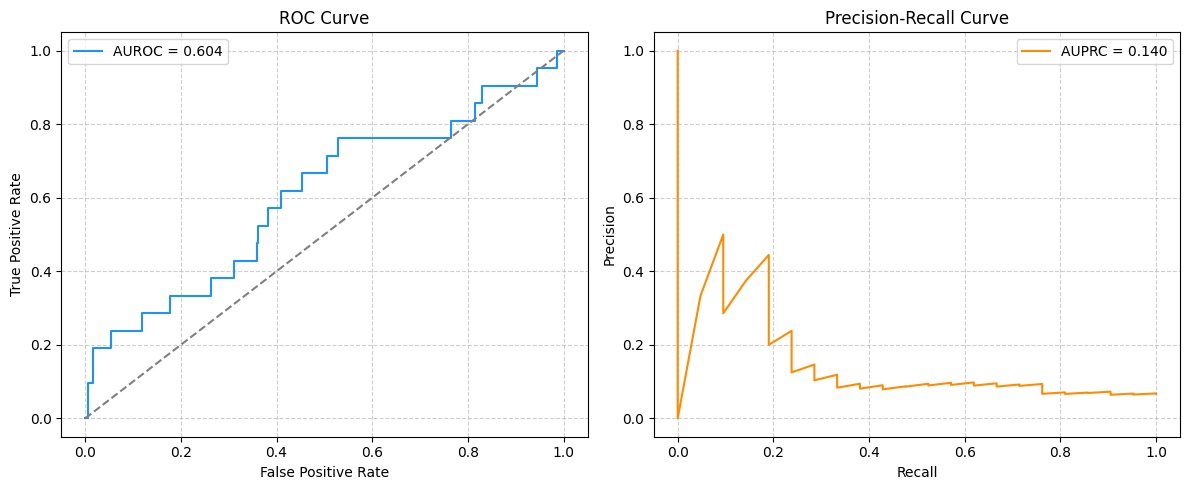

In [82]:
import numpy as np
from scipy.spatial.distance import mahalanobis
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report, confusion_matrix,
    roc_curve, precision_recall_curve, auc
)
import matplotlib.pyplot as plt

# 假設你已經有 X, y（X: ndarray, y: ndarray, label 0=正常, 1=異常）

# 1. 分割資料
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 2. 只用正常樣本 fit Gaussian（mean, cov）
normal_idx = (y_train == 0)
X_normal = X_train[normal_idx]
mu = X_normal.mean(axis=0)
cov = np.cov(X_normal, rowvar=False)
cov += 1e-6 * np.eye(cov.shape[0])  # 避免矩陣奇異
cov_inv = np.linalg.inv(cov)

# 3. Mahalanobis distance 當 anomaly score
def anomaly_score(x):
    return mahalanobis(x, mu, cov_inv)
scores = np.array([anomaly_score(x) for x in X_test])

# 4. 設定 threshold（這裡舉例用 95%）
threshold = np.percentile(scores, 95)
y_pred = (scores > threshold).astype(int)

# 5. 評估成效
print("=== classification report ===")
print(classification_report(y_test, y_pred, digits=4))
print("=== confusion matrix ===")
print(confusion_matrix(y_test, y_pred))

# 6. 畫 ROC 與 Precision-Recall curve
fpr, tpr, _ = roc_curve(y_test, scores)
precision, recall, _ = precision_recall_curve(y_test, scores)
auroc = auc(fpr, tpr)
auprc = auc(recall, precision)

plt.figure(figsize=(12, 5))

# --- ROC Curve ---
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label=f'AUROC = {auroc:.3f}', color='dodgerblue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# --- Precision-Recall Curve ---
plt.subplot(1, 2, 2)
plt.plot(recall, precision, label=f'AUPRC = {auprc:.3f}', color='darkorange')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()
